In [ ]:
# ============================================
# 1
# Descargar SOLO una carpeta desde GitHub en Google Colab (Sparse Checkout)
# Deja la carpeta lista en /content/DataImg
# ============================================

import os
import shutil
import subprocess

# 1) Variables
REPO_URL = "https://github.com/GuidoRiosCiaffaroni/Machine_Learning_II.git"
FOLDER_NAME = "DataImg/TomatoDataset_ready"
TMP_DIR = "/content/repo_temporal"

# 2) Helpers
def run(cmd, cwd=None):
    print(f"\n$ {cmd}")
    subprocess.check_call(cmd, shell=True, cwd=cwd)

def get_default_branch(repo_url):
    # Detecta rama por defecto (main / master)
    try:
        out = subprocess.check_output(
            f'git ls-remote --symref {repo_url} HEAD',
            shell=True,
            text=True
        )
        for line in out.splitlines():
            if line.startswith("ref:"):
                return line.split("refs/heads/")[-1].split("\t")[0].strip()
    except Exception:
        pass
    return "main"

# 3) Preparación: limpiar previos
shutil.rmtree(TMP_DIR, ignore_errors=True)
shutil.rmtree(f"/content/{FOLDER_NAME}", ignore_errors=True)
os.makedirs(TMP_DIR, exist_ok=True)

# 4) Detectar rama por defecto
BRANCH = get_default_branch(REPO_URL)
print(f" Rama detectada: {BRANCH}")

# 5) Inicializar repo temporal y configurar sparse checkout
run("git init", cwd=TMP_DIR)
run(f'git remote add origin "{REPO_URL}"', cwd=TMP_DIR)
run("git sparse-checkout init --cone", cwd=TMP_DIR)
run(f'git sparse-checkout set "{FOLDER_NAME}"', cwd=TMP_DIR)

# 6) Descargar solo esa carpeta
run(f'git pull --depth 1 origin "{BRANCH}"', cwd=TMP_DIR)

# 7) Mover a /content y limpiar
src_path = os.path.join(TMP_DIR, FOLDER_NAME)
dst_path = os.path.join("/content", FOLDER_NAME)

if not os.path.exists(src_path):
    raise FileNotFoundError(
        f"No se encontró la carpeta '{FOLDER_NAME}' en el repo. "
        f"Revisa que exista en la rama '{BRANCH}'."
    )

shutil.move(src_path, dst_path)
shutil.rmtree(TMP_DIR, ignore_errors=True)

print(f"\n Proceso finalizado. Carpeta lista en: {dst_path}")
print(" Archivos (primeros 30):")
print(os.listdir(dst_path)[:30])


 Rama detectada: main

$ git init

$ git remote add origin "https://github.com/GuidoRiosCiaffaroni/Machine_Learning_II.git"

$ git sparse-checkout init --cone

$ git sparse-checkout set "DataImg/TomatoDataset_ready"

$ git pull --depth 1 origin "main"

 Proceso finalizado. Carpeta lista en: /content/DataImg/TomatoDataset_ready
 Archivos (primeros 30):
['Tomato___Late_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Target_Spot', 'Tomato___Leaf_Mold', 'Tomato___Bacterial_spot', 'Tomato___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']


# Bloque 1 — Setup, imports y reproducibilidad


### Objetivo general
Este bloque prepara el entorno de ejecución para que los experimentos de Machine Learning / Deep Learning sean **reproducibles**. En particular, fija una **semilla aleatoria (seed)** para reducir la variabilidad entre ejecuciones y asegurar que resultados como particiones de datos, muestreos y procesos estocásticos sean lo más consistentes posible.

---

### Paso 1: Importación de librerías base del entorno
Se cargan módulos estándar:

- **`os`**: permite interactuar con el sistema operativo y configurar variables de entorno.
- **`random`**: controla el generador de números aleatorios nativo de Python (usado en muestreos simples o procesos aleatorios no dependientes de NumPy).
- **`numpy`**: controla el generador de números aleatorios que suele intervenir en preprocesamiento, transformaciones numéricas y, en general, en pipelines de datos.

**Relevancia:**  
En ciencia de datos, distintas librerías pueden usar generadores de números aleatorios diferentes. Importarlas explícitamente permite controlarlas de forma unificada.

---

### Paso 2: Definición de una semilla fija (`SEED`)
Se establece una constante con un valor entero (por ejemplo, 42) que actuará como **parámetro de control** de aleatoriedad.

**Interpretación:**  
La semilla es el “punto de partida” del generador pseudoaleatorio: con la misma semilla, el generador produce la misma secuencia de valores.

---

### Paso 3: Encapsulación del control aleatorio en una función
Se define una función dedicada a la reproducibilidad, lo que constituye una **buena práctica** porque:

- centraliza el control de aleatoriedad en un único lugar,
- evita repetición de código,
- permite reutilizarla en notebooks o scripts más grandes.

---

### Paso 4: Fijación de semillas para distintos generadores
Dentro de la función se fijan las semillas de manera explícita en tres niveles:

1. **Semilla de `random` (Python estándar)**  
   Asegura consistencia en operaciones aleatorias realizadas con el módulo nativo.

2. **Semilla de `numpy`**  
   Controla operaciones aleatorias numéricas, por ejemplo: shuffle, sampling, inicialización de arreglos aleatorios y transformaciones.

3. **Variable de entorno `PYTHONHASHSEED`**  
   Estabiliza el “hashing” interno de Python para estructuras como diccionarios y sets, lo cual puede afectar el orden y, en ciertos casos, la reproducibilidad indirecta del flujo de datos.

**Por qué esto importa:**  
En pipelines reales, pequeñas variaciones en ordenamientos o muestreos pueden generar diferencias en entrenamiento, validación o métricas. Este bloque reduce ese problema.

---

### Paso 5: Ejecución de la función con la semilla definida
Se invoca la función usando el valor de `SEED`, aplicando efectivamente la configuración de reproducibilidad para la sesión actual.

---

### Paso 6: Confirmación visual
Se imprime un mensaje para dejar evidencia en el log de ejecución de que la semilla quedó fijada correctamente.

**Valor práctico:**  
Esto facilita auditoría y depuración: al revisar el notebook, se sabe con qué semilla se entrenó un modelo.

---

### Resultado final del bloque
Al finalizar este bloque, el notebook queda preparado para ejecutar experimentos de forma más consistente, reduciendo la variación atribuible al azar y mejorando la calidad metodológica del trabajo.


In [ ]:
# =========================
# BLOQUE 1: Setup e imports
# =========================
import os
import random
import numpy as np

SEED = 42

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)

set_seed(SEED)

print("Seed fijada:", SEED)


Seed fijada: 42


# BLOQUE 2 — Rutas y validación del dataset (Estructura supervisada)



### Objetivo general
Este bloque verifica que el conjunto de datos esté **correctamente ubicado y estructurado** en Google Colab bajo el formato estándar de **clasificación supervisada por carpetas**, donde:

- Cada **subcarpeta** representa una **clase** (enfermedad o estado saludable).
- Dentro de cada carpeta se almacenan las **imágenes** correspondientes a esa clase.

Además, realiza un **conteo exploratorio rápido** del número de imágenes por clase para identificar posibles **desbalances**, faltantes o problemas de carga.

---

### Paso 1: Definición de la ruta raíz del dataset
Se establece una variable que apunta al directorio principal donde se encuentra el dataset en el entorno Colab.

**Relevancia:**
- Centraliza la ruta en una sola variable, facilitando mantenimiento del notebook.
- Evita errores al repetir rutas manualmente en múltiples celdas.

---

### Paso 2: Validación de existencia del directorio
Se ejecuta una verificación estricta que detiene la ejecución si el directorio no existe.

**Interpretación metodológica:**
- Esto corresponde a una buena práctica de programación defensiva (*fail fast*): si el dataset no está en el lugar esperado, el notebook se detiene inmediatamente y evita errores posteriores más difíciles de diagnosticar.

---

### Paso 3: Descubrimiento automático de clases desde carpetas
Se listan los elementos dentro del directorio raíz y se filtran únicamente aquellos que son subdirectorios.  
Luego, se ordenan alfabéticamente para asegurar consistencia.

**Por qué es importante:**
- En problemas de imágenes, el estándar de *datasets supervisados* es “carpeta = clase”.
- El ordenamiento alfabético genera un mapeo estable entre índice y clase, lo que ayuda a que:
  - las métricas por clase,
  - los reportes,
  - y las matrices de confusión  
  sean interpretables de manera consistente a través de ejecuciones.

---

### Paso 4: Verificación del número de clases y nombres detectados
Se imprimen:
- la cantidad total de clases detectadas,
- y el listado de clases.

**Utilidad práctica:**
- Confirma rápidamente que el dataset contiene todas las categorías esperadas.
- Permite detectar errores típicos como:
  - carpetas mal nombradas,
  - duplicadas,
  - o clases faltantes.

---

### Paso 5: Definición de extensiones válidas de imágenes
Se define un conjunto de extensiones aceptadas para identificar archivos de imagen.

**Por qué se hace:**
- Evita contar archivos que no son imágenes (por ejemplo `.txt`, `.csv`, `.json` o archivos ocultos).
- Hace que el conteo sea más confiable en entornos donde pueden existir archivos auxiliares.

---

### Paso 6: Conteo de imágenes por clase
Para cada clase:
1. Se construye la ruta completa a su carpeta.
2. Se recorren los archivos dentro de esa carpeta.
3. Se cuentan solo aquellos cuyo nombre termina con una extensión válida de imagen.

El resultado se almacena en una estructura tipo diccionario “clase → cantidad”.

**Relevancia para Machine Learning:**
- Este conteo es un primer diagnóstico de:
  - **tamaño del dataset**,
  - **desbalance de clases**,
  - posibles clases con muy pocos ejemplos, lo cual puede afectar:
    - el entrenamiento,
    - la generalización,
    - y métricas como el Macro F1.

---

### Paso 7: Presentación ordenada de resultados
Finalmente, se imprime el conteo por clase **ordenado desde la clase con menos imágenes a la que tiene más**.

**Valor analítico:**
- Permite identificar rápidamente clases minoritarias.
- Facilita decidir acciones posteriores como:
  - aumento de datos (*data augmentation*),
  - ponderación de clases,
  - o recolección adicional de imágenes en clases críticas.

---

### Resultado final del bloque
Al finalizar, se obtiene una validación completa de que:

1. El dataset existe en la ruta declarada.
2. Las clases están correctamente definidas por subcarpetas.
3. Se conoce cuántas imágenes hay en cada clase.

Esto deja el notebook listo para el siguiente paso: construir el pipeline de carga de imágenes y particionar en entrenamiento/validación/prueba de forma consistente.


In [ ]:
# =========================
# BLOQUE 2: Rutas y validación
# =========================
DATASET_DIR = "/content/DataImg/TomatoDataset_ready"  # según tu árbol

assert os.path.isdir(DATASET_DIR), f"No existe el directorio: {DATASET_DIR}"

classes = sorted([d for d in os.listdir(DATASET_DIR) if os.path.isdir(os.path.join(DATASET_DIR, d))])
print("N° clases:", len(classes))
print("Clases:", classes)

# Conteo de imágenes por clase (rápido)
img_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".webp")
counts = {}
for c in classes:
    cdir = os.path.join(DATASET_DIR, c)
    counts[c] = sum(f.lower().endswith(img_extensions) for f in os.listdir(cdir))

print("\nConteo por clase:")
for k,v in sorted(counts.items(), key=lambda x: x[1]):
    print(f"{k}: {v}")


N° clases: 10
Clases: ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

Conteo por clase:
Tomato___Tomato_mosaic_virus: 373
Tomato___Leaf_Mold: 952
Tomato___Early_blight: 998
Tomato___Target_Spot: 1404
Tomato___healthy: 1585
Tomato___Spider_mites Two-spotted_spider_mite: 1676
Tomato___Septoria_leaf_spot: 1771
Tomato___Late_blight: 1897
Tomato___Bacterial_spot: 2126
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 4761


# BLOQUE 3 — Indexar el dataset (rutas de imágenes + etiquetas)


### Objetivo general
Este bloque construye una **tabla estructurada (DataFrame)** que representa el dataset de imágenes en formato “tabular”, donde cada fila corresponde a una imagen y contiene:

- la **ruta completa del archivo** (path),
- la **etiqueta de clase** (label), derivada del nombre de la carpeta.

Esto transforma el dataset desde una estructura de carpetas a una estructura apta para **preprocesamiento, partición (train/val/test), muestreo y entrenamiento** con metodologías reproducibles.

---

### Paso 1: Importación de herramienta para manejo tabular
Se importa **pandas**, una librería estándar en Ciencia de Datos para:

- organizar datos en tablas,
- filtrar, agrupar y analizar,
- preparar insumos para modelos.

**Relevancia:**  
Aunque el problema sea de imágenes, estructurar el dataset como tabla facilita aplicar buenas prácticas del flujo de ML (splits estratificados, validaciones, EDA de clases, etc.).

---

### Paso 2: Inicialización de un contenedor de registros
Se crea una lista vacía que actuará como acumulador de ejemplos del dataset.

**Interpretación:**  
Cada elemento agregado a esta lista representará una “observación” del dataset: una imagen con su clase.

---

### Paso 3: Recorrido de clases (carpetas)
Se itera sobre la lista `classes`, que contiene los nombres de las clases (por ejemplo, enfermedades).

Para cada clase:
- se construye la ruta a su carpeta correspondiente dentro del directorio raíz del dataset.

**Por qué es importante:**  
En clasificación supervisada por carpetas, el nombre de la carpeta es la fuente de la etiqueta (*ground truth*), por lo que este paso define el vínculo formal entre imagen y clase.

---

### Paso 4: Lectura de archivos dentro de cada carpeta
Dentro de cada carpeta de clase, se listan los archivos presentes y se recorre cada nombre de archivo.

**Relevancia práctica:**  
Este paso permite indexar automáticamente el dataset sin necesidad de un archivo CSV externo.

---

### Paso 5: Filtrado por extensiones válidas de imagen
Antes de incorporar un archivo al dataset, se verifica que su nombre termina con una extensión permitida (por ejemplo `.jpg`, `.png`, etc.).

**Justificación:**
- Evita incluir archivos no-imagen (metadatos, archivos ocultos, textos, etc.).
- Aumenta la confiabilidad del pipeline.
- Previene errores posteriores al cargar imágenes para entrenamiento.

---

### Paso 6: Creación del registro (path + label)
Cuando un archivo es válido:
- se crea un registro que contiene:
  - `path`: ruta completa al archivo de imagen,
  - `label`: la clase asociada (nombre de la carpeta).

Ese registro se agrega al contenedor.

**Resultado conceptual:**  
Se obtiene una lista de pares (imagen, clase) que representa el dataset completo.

---

### Paso 7: Conversión a DataFrame
La lista de registros se transforma en un **DataFrame**, quedando una tabla con dos columnas principales:

- **`path`**: ubicación de cada imagen en disco.
- **`label`**: etiqueta supervisada correspondiente.

**Ventajas metodológicas:**
- Permite aplicar particiones estratificadas con facilidad.
- Facilita análisis de desbalance, conteos y auditoría.
- Soporta trazabilidad: cada predicción puede asociarse a un archivo específico.

---

### Paso 8: Validación rápida del resultado
Finalmente:
- se imprime el número total de imágenes indexadas,
- y se muestra una vista previa de las primeras filas para verificar que:
  - las rutas están correctas,
  - las etiquetas corresponden a las clases esperadas.

---

### Resultado final del bloque
Al finalizar, el dataset queda representado como una estructura tabular estándar, lista para:

1. separación en entrenamiento/validación/prueba,
2. análisis exploratorio de distribución de clases,
3. construcción de pipelines de carga y preprocesamiento,
4. entrenamiento y evaluación reproducible de modelos.


In [ ]:
# =========================
# BLOQUE 3: Indexar dataset (paths + labels)
# =========================
import pandas as pd

rows = []
for label in classes:
    folder = os.path.join(DATASET_DIR, label)
    for fname in os.listdir(folder):
        if fname.lower().endswith(img_extensions):
            rows.append({"path": os.path.join(folder, fname), "label": label})

df = pd.DataFrame(rows)
print("Total imágenes:", len(df))
df.head()


Total imágenes: 17543


,path,label
0,/content/DataImg/TomatoDataset_ready/Tomato___...,Tomato___Bacterial_spot
1,/content/DataImg/TomatoDataset_ready/Tomato___...,Tomato___Bacterial_spot
2,/content/DataImg/TomatoDataset_ready/Tomato___...,Tomato___Bacterial_spot
3,/content/DataImg/TomatoDataset_ready/Tomato___...,Tomato___Bacterial_spot
4,/content/DataImg/TomatoDataset_ready/Tomato___...,Tomato___Bacterial_spot


# BLOQUE 4 — Split estratificado (Train / Validación / Test)



### Objetivo general
Este bloque realiza una **separación controlada y reproducible** del dataset en tres subconjuntos:

- **Entrenamiento (Train):** usado para ajustar los parámetros del modelo.
- **Validación (Val):** usado para comparar modelos e hiperparámetros sin “mirar” el test.
- **Prueba (Test):** usado exclusivamente para la **evaluación final** de generalización.

Además, asegura que la partición sea **estratificada**, es decir, que mantenga proporciones de clases similares en cada subconjunto, lo cual es fundamental cuando existe **desbalance de clases**.

---

### Paso 1: Importación de la función de particionado
Se importa `train_test_split`, una herramienta estándar de *scikit-learn* para dividir datos en subconjuntos de forma controlada.

**Relevancia:**  
Permite generar particiones reproducibles y aplicar estratificación, lo que se considera una buena práctica metodológica en Machine Learning supervisado.

---

### Paso 2: Primera partición — Separación Train/Test
Se divide el DataFrame completo en:

- **80% para entrenamiento inicial**
- **20% para prueba (test)**

La división se realiza con:
- una **semilla fija** (`random_state=SEED`) para reproducibilidad,
- **estratificación por etiqueta** para mantener la distribución de clases.

**Justificación de la estratificación:**
- Si el dataset está desbalanceado, un split aleatorio podría dejar algunas clases con muy pocos (o cero) ejemplos en test.
- La estratificación preserva la proporción de clases, haciendo que la evaluación sea más representativa.

---

### Paso 3: Segunda partición — Separación Train/Validación
Luego, el subconjunto de entrenamiento resultante se vuelve a dividir en:

- **80% de ese bloque para entrenamiento final**
- **20% de ese bloque para validación**

En términos aproximados del total original, esto produce:
- **Train ≈ 64%**
- **Val ≈ 16%**
- **Test = 20%**

También se mantiene:
- `random_state=SEED` para consistencia,
- estratificación basada en las etiquetas del subconjunto de entrenamiento.

**Motivo metodológico:**
- La validación permite seleccionar modelo e hiperparámetros sin sobreajustar al test.
- El test se reserva como “muestra no vista” para medir generalización real.

---

### Paso 4: Resumen del tamaño de cada partición
Se imprime el número de ejemplos en cada subconjunto para:

- comprobar que la partición se realizó correctamente,
- confirmar que el tamaño de train es suficiente para entrenar,
- asegurar que val y test tienen tamaños adecuados para evaluar.

---

### Paso 5: Inspección rápida de la distribución de clases en Train
Se calcula la distribución relativa de clases en el conjunto de entrenamiento y se imprime una muestra.

**Propósito analítico:**
- verificar que el split estratificado funcionó correctamente,
- detectar clases muy minoritarias que podrían:
  - dificultar el aprendizaje del modelo,
  - reducir el *recall* en esas clases,
  - afectar métricas agregadas como **Macro F1**.

---

### Resultado final del bloque
Al finalizar este bloque se obtiene:

1. Una partición **reproducible** en Train/Val/Test.
2. Una distribución de clases más estable entre subconjuntos gracias a la **estratificación**.
3. Un punto de partida metodológicamente correcto para:
   - entrenar modelos,
   - ajustar hiperparámetros en validación,
   - y evaluar desempeño final sin sesgo en test.


In [ ]:
# =========================
# BLOQUE 4: Split estratificado
# =========================
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df, test_size=0.20, random_state=SEED, stratify=df["label"]
)

train_df, val_df = train_test_split(
    train_df, test_size=0.20, random_state=SEED, stratify=train_df["label"]
)

print("Train:", len(train_df), "Val:", len(val_df), "Test:", len(test_df))
print("\nDistribución (Train):")
print(train_df["label"].value_counts(normalize=True).head(10))


Train: 11227 Val: 2807 Test: 3509

Distribución (Train):
label
Tomato___Tomato_Yellow_Leaf_Curl_Virus           0.271399
Tomato___Bacterial_spot                          0.121226
Tomato___Late_blight                             0.108132
Tomato___Septoria_leaf_spot                      0.101007
Tomato___Spider_mites Two-spotted_spider_mite    0.095573
Tomato___healthy                                 0.090318
Tomato___Target_Spot                             0.079986
Tomato___Early_blight                            0.056827
Tomato___Leaf_Mold                               0.054333
Tomato___Tomato_mosaic_virus                     0.021199
Name: proportion, dtype: float64


# PARTE A — BASELINE: HOG + Random Forest (modelo 1)

# BLOQUE 5 — Extracción de características HOG (Histogram of Oriented Gradients)


### Objetivo general
Este bloque transforma las imágenes (datos no estructurados) en una representación numérica **tabular** apta para modelos clásicos de Machine Learning (por ejemplo, Random Forest).  
Para ello se extraen **descriptores HOG**, una técnica clásica de visión por computador que resume la **información de bordes y texturas** mediante histogramas de orientaciones de gradiente.

En términos prácticos, este bloque convierte cada imagen en un **vector de características** de longitud fija, generando matrices:

- `X_train_hog`, `X_val_hog`, `X_test_hog` (features)
- `y_train`, `y_val`, `y_test` (etiquetas)

---

### Paso 1: Instalación de la librería requerida
Se instala `scikit-image`, una librería especializada en procesamiento de imágenes que incluye herramientas robustas para:

- lectura de imágenes,
- transformaciones geométricas,
- extracción de características clásicas (como HOG).

**Relevancia en Colab:**  
Como el entorno puede no incluir esta librería por defecto, se asegura su disponibilidad antes de importarla.

---

### Paso 2: Importación de funciones de procesamiento de imágenes
Se importan utilidades específicas:

- Lectura de imágenes desde disco.
- Conversión a escala de grises.
- Redimensionamiento a tamaño fijo.
- Cálculo del descriptor HOG.

**Justificación:**  
HOG requiere una imagen procesada de forma consistente para que todos los vectores de características tengan la misma dimensionalidad.

---

### Paso 3: Definición de una función reutilizable para extraer HOG
Se define una función que recibe:

- una lista de rutas de imágenes (`paths`),
- un tamaño fijo de imagen (`image_size`).

**Buena práctica:**  
Encapsular este proceso permite reutilizarlo en train/val/test sin duplicar lógica y asegura consistencia metodológica.

---

### Paso 4: Lectura de cada imagen
Para cada ruta en `paths`, se carga la imagen desde el almacenamiento del notebook.

**Nota práctica:**  
Este paso depende del número de imágenes y del tamaño del dataset, por lo que puede ser el principal factor de tiempo.

---

### Paso 5: Normalización geométrica mediante redimensionamiento
Cada imagen se redimensiona a un tamaño fijo (por defecto 128×128) con antialiasing.

**Por qué es necesario:**
- Los datasets reales suelen incluir imágenes con distintas resoluciones.
- Modelos clásicos requieren vectores de longitud fija.
- El descriptor HOG depende del tamaño de la imagen y del número de celdas/bloques.

---

### Paso 6: Conversión a escala de grises (cuando corresponde)
Si una imagen está en color (3 canales), se convierte a **grises**.

**Justificación técnica:**
- HOG se basa principalmente en gradientes de intensidad.
- Reducir a grises:
  - disminuye dimensionalidad y costo computacional,
  - mantiene la estructura de bordes y texturas, que suele ser lo más informativo en este descriptor.

---

### Paso 7: Cálculo del descriptor HOG
Se calcula HOG usando parámetros definidos:

- **Orientations = 9:** número de bins del histograma de direcciones del gradiente.
- **Pixels per cell = (8, 8):** tamaño de cada celda donde se resumen gradientes.
- **Cells per block = (2, 2):** agrupación de celdas para normalización local.
- **Block normalization = "L2-Hys":** normalización robusta que mejora invariancia a iluminación y contraste.

#### Fundamento teórico (qué captura HOG)
HOG resume **cómo están orientados los bordes** en distintas zonas de la imagen.  
En hojas enfermas, muchas patologías generan patrones de:

- manchas,
- bordes irregulares,
- texturas anómalas,

por lo que HOG suele funcionar como baseline razonable en clasificación de enfermedades vegetales.

---

### Paso 8: Construcción del dataset tabular de características
El descriptor HOG de cada imagen se agrega a una lista y al final se convierte en un arreglo NumPy:

- Cada fila representa una imagen.
- Cada columna representa una característica HOG.

Esto da matrices del tipo:

- `X_train_hog`: (n_imágenes_train, n_features_hog)
- `X_val_hog`: (n_imágenes_val, n_features_hog)
- `X_test_hog`: (n_imágenes_test, n_features_hog)

---

### Paso 9: Extracción de etiquetas (y) para cada partición
Se obtienen las etiquetas textuales desde los DataFrames `train_df`, `val_df`, `test_df`.

**Interpretación:**
- `y_train`, `y_val`, `y_test` son los “targets” supervisados.
- Se mantienen alineados con las matrices de features generadas.

---

### Paso 10: Verificación de dimensionalidad
Se imprime la forma de `X_train_hog` para confirmar:

- que el número de muestras coincide con la cantidad de imágenes en train,
- que las features tienen dimensionalidad fija (requisito para entrenar Random Forest).

---

### Resultado final del bloque
Al finalizar, el dataset de imágenes queda transformado a un problema clásico de ML:

- **Entrada (X):** vectores HOG (features numéricas)
- **Salida (y):** etiquetas de enfermedad

Esto habilita el entrenamiento de modelos como Random Forest, SVM o Regresión Logística, cumpliendo el enfoque de clasificación supervisada con un pipeline reproducible.


In [ ]:
# =========================
# BLOQUE 5: HOG features
# =========================
!pip -q install scikit-image

from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.feature import hog

def extract_hog_features(paths, image_size=(128, 128)):
    X = []
    for p in paths:
        img = imread(p)
        img = resize(img, image_size, anti_aliasing=True)
        if img.ndim == 3:
            img = rgb2gray(img)
        feat = hog(
            img,
            orientations=9,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            block_norm="L2-Hys"
        )
        X.append(feat)
    return np.array(X)

# Extraer features (puede tardar según tamaño del dataset)
X_train_hog = extract_hog_features(train_df["path"].values)
X_val_hog   = extract_hog_features(val_df["path"].values)
X_test_hog  = extract_hog_features(test_df["path"].values)

y_train = train_df["label"].values
y_val   = val_df["label"].values
y_test  = test_df["label"].values

print("X_train_hog:", X_train_hog.shape)


X_train_hog: (11227, 8100)


# BLOQUE 6 — Entrenamiento y evaluación de Random Forest sobre características HOG


### Objetivo general
Este bloque entrena un **modelo de clasificación supervisada Random Forest** utilizando como entrada los **vectores de características HOG** extraídos previamente desde las imágenes, y luego evalúa su desempeño en el conjunto de **validación** mediante:

- **Accuracy** (exactitud global),
- **Reporte de clasificación** (precision, recall y F1-score por clase).

Este modelo actúa típicamente como un **baseline fuerte** en visión por computador clásica: no aprende directamente desde píxeles, sino desde descriptores diseñados (HOG).

---

### Paso 1: Importación del modelo y métricas de evaluación
Se importan:

- **RandomForestClassifier**: algoritmo de ensamble basado en múltiples árboles de decisión.
- Métricas de clasificación:
  - **accuracy**: proporción total de aciertos.
  - **classification_report**: métricas por clase (precision/recall/F1/support).
  - **confusion_matrix**: (aunque no se imprime aquí, se suele usar en el bloque siguiente para análisis de errores).

**Relevancia:**  
En problemas multiclase, el reporte por clase es esencial, ya que el accuracy no informa dónde se concentra el error (qué enfermedades se confunden).

---

### Paso 2: Definición del modelo Random Forest
Se instancia un Random Forest con hiperparámetros explícitos, lo que es una buena práctica porque:

- documenta decisiones metodológicas,
- permite reproducibilidad,
- facilita tuning posterior (Grid Search).

#### Interpretación y efecto de hiperparámetros
- **`n_estimators=400`**  
  Número de árboles en el ensamble.  
  - Más árboles tienden a **reducir varianza** y estabilizar predicciones.
  - Aumentan el costo computacional, pero suelen mejorar rendimiento hasta un punto de saturación.

- **`max_depth=None`**  
  Los árboles crecen sin un límite explícito de profundidad.  
  - Puede capturar patrones complejos.
  - Incrementa el riesgo de **sobreajuste**, aunque Random Forest lo mitiga mediante bagging y promediado.

- **`min_samples_leaf=1`**  
  Permite hojas con un solo ejemplo.  
  - Maximiza capacidad de ajuste.
  - Puede aumentar sobreajuste; un valor mayor actúa como regularización.

- **`class_weight="balanced"`**  
  Ajusta pesos inversamente proporcionales a la frecuencia de cada clase.  
  - Busca evitar que el modelo favorezca clases mayoritarias.
  - Suele mejorar **recall** en clases minoritarias, a veces con leve costo en accuracy.

- **`random_state=SEED`**  
  Controla la aleatoriedad del muestreo de datos y construcción de árboles.  
  - Hace el entrenamiento reproducible.

- **`n_jobs=-1`**  
  Usa todos los núcleos disponibles para paralelizar entrenamiento y predicción.  
  - Mejora tiempo de ejecución sin cambiar resultados.

---

### Paso 3: Entrenamiento del modelo
El modelo se ajusta usando:

- **`X_train_hog`**: matriz de features HOG del conjunto de entrenamiento.
- **`y_train`**: etiquetas reales del conjunto de entrenamiento.

**Interpretación conceptual:**  
Random Forest aprende reglas de decisión no lineales sobre el espacio de características HOG, combinando múltiples árboles construidos con subconjuntos aleatorios de datos y variables.

---

### Paso 4: Predicción sobre el conjunto de validación
Se generan predicciones para el conjunto `X_val_hog`.

**Justificación metodológica:**
- Se evalúa en validación para estimar rendimiento en datos no vistos durante el ajuste.
- Validación se utiliza para comparar modelos e hiperparámetros sin contaminar el conjunto test.

---

### Paso 5: Cálculo e impresión de Accuracy en validación
Se calcula la **exactitud global** comparando etiquetas reales de validación con predicciones.

**Interpretación:**
- Indica el porcentaje total de aciertos.
- En datasets desbalanceados puede ser engañosa, por lo que debe complementarse con métricas por clase.

---

### Paso 6: Reporte de clasificación por clase
Se imprime un resumen por clase con:

- **Precision:** de las veces que el modelo predijo una clase, cuántas fueron correctas.
- **Recall:** de los casos reales de esa clase, cuántos detectó el modelo.
- **F1-score:** balance entre precision y recall.
- **Support:** cuántos ejemplos reales de esa clase hay en validación.

**Valor analítico:**
- Permite detectar enfermedades con bajo recall (el modelo no las reconoce).
- Permite detectar enfermedades con baja precision (el modelo las confunde con otras).
- Identifica si el desempeño es homogéneo o si se concentra en ciertas clases.

---

### Resultado final del bloque
Al finalizar, se obtiene:

1. Un modelo **Random Forest** entrenado sobre descriptores HOG.
2. Una primera estimación de desempeño en **validación** mediante:
   - accuracy,
   - métricas por clase (precision/recall/F1).

Este resultado sirve como línea base para:
- comparar contra modelos mejorados (por ejemplo, Random Forest con embeddings de CNN),
- aplicar ajuste de hiperparámetros con Grid Search,
- y analizar errores con matriz de confusión en el siguiente bloque.


In [ ]:
# =========================
# BLOQUE 6: Random Forest sobre HOG
# =========================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf_hog = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_leaf=1,
    class_weight="balanced",
    random_state=SEED,
    n_jobs=-1
)

rf_hog.fit(X_train_hog, y_train)

val_pred = rf_hog.predict(X_val_hog)
print("Accuracy (val):", accuracy_score(y_val, val_pred))
print(classification_report(y_val, val_pred))


Accuracy (val): 0.4880655504096901
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.74      0.53      0.62       340
                        Tomato___Early_blight       0.00      0.00      0.00       160
                         Tomato___Late_blight       0.75      0.57      0.65       303
                           Tomato___Leaf_Mold       0.69      0.43      0.53       152
                  Tomato___Septoria_leaf_spot       0.72      0.10      0.17       283
Tomato___Spider_mites Two-spotted_spider_mite       0.86      0.25      0.39       268
                         Tomato___Target_Spot       1.00      0.00      0.01       225
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.37      0.98      0.54       762
                 Tomato___Tomato_mosaic_virus       0.00      0.00      0.00        60
                             Tomato___healthy       0.94      0.41      0.57       254

      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# BLOQUE 7 — Matriz de confusión (Validación) para RF + HOG


### Objetivo general
Este bloque construye y visualiza la **matriz de confusión** del modelo **Random Forest entrenado con características HOG** sobre el conjunto de **validación**.  
La matriz de confusión permite analizar el desempeño **más allá del accuracy**, identificando:

- qué clases se predicen correctamente,
- cuáles se confunden entre sí,
- y qué patrones de error son sistemáticos.

Este análisis es especialmente relevante en clasificación multiclase de enfermedades, donde algunas patologías pueden tener apariencias visuales similares.

---

### Paso 1: Importación de herramientas de visualización
Se carga:

- una librería de gráficos para renderizar figuras en el notebook,
- un componente de *scikit-learn* diseñado para **construir y mostrar** matrices de confusión de manera directa.

**Relevancia:**  
La visualización facilita la interpretación rápida y comparativa entre modelos, lo que es clave en un contexto académico y en la discusión de resultados.

---

### Paso 2: Construcción de la matriz de confusión desde etiquetas reales y predichas
Se genera la matriz usando:

- **`y_val`**: etiquetas reales del conjunto de validación (*ground truth*),
- **`val_pred`**: etiquetas predichas por el modelo.

**Qué representa conceptualmente:**
- Las **filas** representan la clase real.
- Las **columnas** representan la clase predicha.
- Cada celda contiene el conteo de ejemplos con esa combinación real–predicha.

---

### Paso 3: Ajuste de legibilidad de etiquetas
Se rota el texto de las etiquetas del eje X para:

- evitar solapamientos cuando hay muchas clases,
- asegurar lectura clara de nombres largos (común en etiquetas de enfermedades vegetales).

**Justificación práctica:**  
En datasets con 8–10 clases (o más), la rotación es necesaria para que el gráfico sea interpretable.

---

### Paso 4: Título descriptivo del gráfico
Se añade un título que especifica:

- el subconjunto evaluado (**Validación**),
- y el pipeline utilizado (**Random Forest + HOG**).

**Relevancia metodológica:**  
Esto permite comparar visualmente múltiples matrices (por ejemplo, RF+HOG vs RF+embeddings) sin ambigüedad.

---

### Paso 5: Renderizado de la figura
Se muestra el gráfico en el notebook.

---

## Cómo interpretar la matriz de confusión (criterio académico)

### 1) Diagonal principal = aciertos
Los valores sobre la diagonal indican cuántas muestras de cada clase fueron clasificadas correctamente.

- Una diagonal “fuerte” (valores altos) sugiere buen reconocimiento por clase.

### 2) Valores fuera de la diagonal = confusiones
Las celdas fuera de la diagonal muestran errores específicos:

- Si una clase real A aparece frecuentemente predicha como B,
  existe una confusión sistemática A → B.

### 3) Hallazgos típicos en enfermedades foliares
En enfermedades de hojas es común observar confusiones entre clases visualmente parecidas (por ejemplo, manchas con patrones similares).  
Esto puede guiar mejoras como:

- mayor **data augmentation**,
- recolección de más muestras en clases confusas,
- uso de representaciones más ricas (por ejemplo, embeddings de CNN),
- ajuste fino de hiperparámetros.

---

### Resultado final del bloque
Al finalizar, se obtiene una visualización que permite:

1. Diagnosticar **errores por clase**.
2. Detectar confusiones sistemáticas entre enfermedades.
3. Fundamentar un **análisis crítico** del modelo y proponer mejoras, cumpliendo con la rúbrica del proyecto.


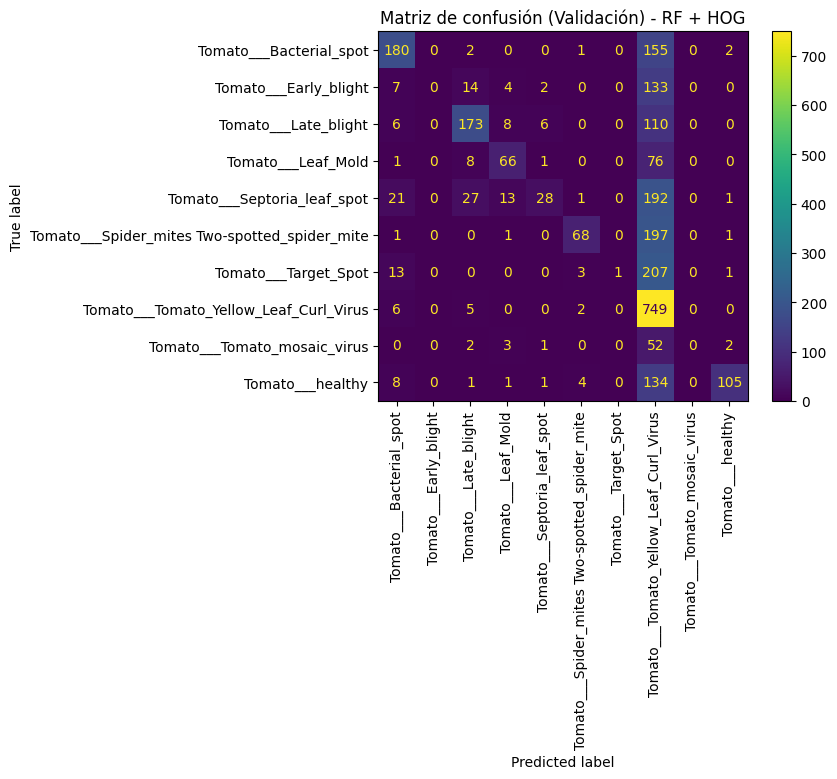

In [ ]:
# =========================
# BLOQUE 7: Matriz de confusión
# =========================
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_val, val_pred, xticks_rotation=90)
plt.title("Matriz de confusión (Validación) - RF + HOG")
plt.show()


#PARTE B — RF con Deep Features (recomendado) (modelo 2)

Problema práctico: HOG suele quedarse corto en problemas de visión compleja.
Solución estándar: extraer embeddings con una CNN preentrenada (EfficientNet/MobileNet) y usar RF arriba.

# BLOQUE 8 — Extracción de *Deep Features* con una CNN preentrenada (MobileNetV2)


### Objetivo general
Este bloque implementa una estrategia de **Transfer Learning como extractor de características**, donde una red convolucional preentrenada (MobileNetV2) se utiliza para transformar cada imagen de hoja de tomate en un **vector numérico compacto (embedding)**.

En lugar de entrenar una CNN desde cero (lo cual requiere muchos datos y alto costo computacional), se reutiliza el conocimiento aprendido por MobileNetV2 en **ImageNet**, y se obtiene para cada imagen una representación de alto nivel que captura patrones visuales relevantes (texturas, formas, bordes, estructuras).

El resultado final es la construcción de matrices:

- **`X_train_deep`**, **`X_val_deep`**, **`X_test_deep`**  
donde cada fila corresponde a una imagen y cada columna a una característica aprendida por la CNN.

Estas matrices quedan listas para ser usadas por modelos clásicos (por ejemplo, Random Forest) como clasificadores finales.

---

### Paso 1: Importación de TensorFlow y componentes de MobileNetV2
Se cargan:

- **TensorFlow** como framework para procesamiento y modelos en Deep Learning.
- **MobileNetV2** como arquitectura CNN ligera y eficiente.
- **`preprocess_input`** asociado a MobileNetV2, que aplica exactamente la normalización esperada por la red (mismo preprocesamiento utilizado en su entrenamiento original).

**Relevancia:**  
Para Transfer Learning, la coherencia del preprocesamiento es crítica: si se normaliza de forma distinta a la original, los embeddings pierden calidad.

---

### Paso 2: Definición del tamaño de entrada de imagen
Se define un tamaño fijo de entrada (224×224).

**Por qué es necesario:**
- Las CNN requieren dimensiones consistentes.
- MobileNetV2 fue diseñada y entrenada con tamaños estándar (224×224 es el más común).
- Asegura que todos los embeddings tengan la misma dimensión final.

---

### Paso 3: Construcción del extractor convolucional preentrenado
Se instancia MobileNetV2 con configuraciones clave:

- **`weights="imagenet"`**: carga pesos preentrenados.
- **`include_top=False`**: elimina la “cabeza” (clasificador final) del modelo original.
- **`pooling="avg"`**: aplica *Global Average Pooling* al final, produciendo un vector 1D por imagen.

#### Interpretación técnica de `include_top=False` y `pooling="avg"`
- Sin la capa final (top), la CNN actúa como **extractor de patrones visuales**.
- El *average pooling* resume los mapas de activación en un **embedding fijo**, lo cual es ideal para:
  - almacenar representaciones,
  - entrenar clasificadores clásicos encima (RF, SVM, etc.),
  - reducir dimensionalidad y ruido.

---

### Paso 4: Congelamiento del extractor (no entrenable)
Se define el modelo como **no entrenable** (extractor fijo).

**Justificación metodológica:**
- Se evita reentrenar la CNN, lo que:
  - reduce tiempo y costo,
  - disminuye riesgo de sobreajuste con pocos datos,
  - mantiene el extractor como “feature generator” estable.

Esta decisión es coherente cuando el objetivo es:  
**“Deep features + clasificador clásico”**, no una CNN finamente ajustada (*fine-tuning*).

---

### Paso 5: Definición del preprocesamiento por imagen (carga + normalización)
Se define una función para transformar una ruta de archivo en un tensor listo para el extractor. El flujo lógico es:

1. Leer bytes de la imagen desde disco.
2. Decodificar a un tensor RGB (3 canales).
3. Redimensionar a 224×224.
4. Aplicar la normalización específica de MobileNetV2.

**Relevancia práctica:**
- Este paso garantiza que el modelo reciba entradas con el formato correcto.
- Permite estandarizar imágenes con resoluciones y formatos heterogéneos.

---

### Paso 6: Construcción de un pipeline eficiente con `tf.data`
Se implementa una función que:

1. Crea un dataset a partir de una lista de rutas (`from_tensor_slices`).
2. Aplica preprocesamiento en paralelo (`map` + `AUTOTUNE`).
3. Agrupa en lotes (`batch`) para eficiencia de GPU/CPU.
4. Pre-carga lotes para evitar cuellos de botella (`prefetch`).

**Por qué esto es importante:**
- En Colab, el rendimiento depende de minimizar tiempos de I/O.
- `tf.data` permite paralelizar lectura y preprocesamiento, mejorando velocidad.
- Batching es esencial para procesar muchas imágenes de forma eficiente.

---

### Paso 7: Extracción de embeddings mediante inferencia del extractor
Con el pipeline listo, se ejecuta el extractor sobre el dataset, obteniendo:

- un vector de características por imagen,
- formando una matriz final de embeddings (n_imágenes, n_features).

**Interpretación conceptual:**
- Cada embedding es una representación aprendida de alto nivel.
- Estas features suelen ser mucho más informativas que descriptores manuales como HOG en tareas visuales complejas.

---

### Paso 8: Extracción de features para Train, Val y Test
Se aplica el mismo proceso a los tres subconjuntos, produciendo:

- `X_train_deep`: embeddings del entrenamiento
- `X_val_deep`: embeddings de validación
- `X_test_deep`: embeddings de prueba

**Justificación:**  
La consistencia del extractor y preprocesamiento asegura que las representaciones sean comparables y no haya sesgo por partición.

---

### Paso 9: Verificación de dimensionalidad
Se imprime la forma de `X_train_deep` para confirmar:

- número de muestras procesadas,
- dimensionalidad del embedding (n_features).

**Valor metodológico:**
- confirma que el pipeline procesó todas las imágenes,
- permite estimar memoria requerida para entrenar modelos clásicos encima.

---

## Resultado final del bloque
Al finalizar, el problema de clasificación de imágenes queda transformado en un problema clásico tabular:

- **Entrada (X):** embeddings profundos (deep features) por imagen  
- **Salida (y):** etiquetas de enfermedad (ya definidas en pasos anteriores)

Esto habilita entrenar clasificadores como Random Forest con mayor capacidad predictiva, manteniendo un enfoque reproducible y eficiente en Google Colab.


In [ ]:
# =========================
# BLOQUE 8: Deep features (CNN preentrenada)
# =========================
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

IMG_SIZE = (224, 224)

base_cnn = MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
    pooling="avg"
)
base_cnn.trainable = False  # extractor fijo

def load_and_preprocess(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    img = tf.image.resize(img, IMG_SIZE)
    img = preprocess_input(img)
    return img

def extract_deep_features(paths, batch_size=64):
    ds = tf.data.Dataset.from_tensor_slices(paths)
    ds = ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    feats = base_cnn.predict(ds, verbose=1)
    return feats

X_train_deep = extract_deep_features(train_df["path"].values)
X_val_deep   = extract_deep_features(val_df["path"].values)
X_test_deep  = extract_deep_features(test_df["path"].values)

print("X_train_deep:", X_train_deep.shape)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 40s 114ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 18s 427ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 18s 340ms/step
X_train_deep: (11227, 1280)


# BLOQUE 9 — Entrenamiento y evaluación de Random Forest sobre *embeddings* (Deep Features)



### Objetivo general
Este bloque entrena un **Random Forest** usando como entradas los **embeddings** (características profundas) extraídos previamente con una CNN preentrenada. Posteriormente, evalúa el desempeño del modelo en el conjunto de **validación** mediante:

- **Accuracy** (exactitud global),
- **Reporte de clasificación** (precision, recall, F1-score y soporte por clase).

Este enfoque corresponde a un pipeline híbrido ampliamente usado en visión por computador cuando se desea combinar:

- **Transfer Learning** (como extractor de representación),
- con un **clasificador tradicional** (Random Forest) para la decisión final.

---

### Paso 1: Definición del modelo Random Forest para embeddings
Se instancia un clasificador Random Forest con hiperparámetros explícitos. Esto es importante porque:

- deja trazabilidad metodológica (qué configuración se usó),
- permite replicación del experimento,
- facilita comparación y ajuste posterior (por ejemplo, con Grid Search).

#### Interpretación y efecto de hiperparámetros
- **`n_estimators=600`**  
  Aumenta el número de árboles respecto al baseline HOG, buscando:
  - **reducir varianza** del ensamble,
  - estabilizar predicciones en un espacio de características más rico,
  - mejorar rendimiento (a costa de mayor tiempo de entrenamiento).

- **`max_depth=None`**  
  Permite árboles sin límite explícito de profundidad:
  - aumenta capacidad para modelar fronteras complejas,
  - puede inducir sobreajuste, aunque Random Forest lo amortigua por bagging.

- **`min_samples_leaf=1`**  
  Mantiene máxima flexibilidad:
  - favorece ajuste fino a patrones presentes en embeddings,
  - puede sobreajustar si el dataset es pequeño; valores mayores regularizan.

- **`class_weight="balanced"`**  
  Compensa desbalance asignando mayor peso a clases minoritarias:
  - mejora sensibilidad (*recall*) para clases con menos ejemplos,
  - puede disminuir levemente accuracy global si el modelo deja de favorecer clases mayoritarias.

- **`random_state=SEED`**  
  Controla la aleatoriedad del muestreo (bootstrap) y selección de atributos:
  - hace el experimento reproducible.

- **`n_jobs=-1`**  
  Paraleliza el entrenamiento y predicción usando todos los núcleos disponibles.

---

### Paso 2: Entrenamiento del modelo con embeddings de entrenamiento
El Random Forest se ajusta utilizando:

- **`X_train_deep`**: matriz donde cada fila es el embedding de una imagen del conjunto train.
- **`y_train`**: etiqueta real asociada a cada embedding (clase de enfermedad).

#### Interpretación conceptual
En lugar de aprender desde píxeles, el modelo aprende sobre un **espacio semántico** generado por la CNN, donde:

- imágenes con patrones similares suelen quedar cercanas en representación,
- el clasificador puede separar clases con fronteras no lineales con mayor facilidad.

---

### Paso 3: Predicción sobre el conjunto de validación
Se generan predicciones para:

- **`X_val_deep`**: embeddings de validación.

**Justificación metodológica:**
- La validación se usa para medir desempeño en datos no vistos durante el entrenamiento,
- y sirve para comparar este enfoque contra alternativas (por ejemplo RF+HOG o modelos adicionales).

---

### Paso 4: Cálculo e impresión de Accuracy en validación
Se calcula la proporción total de predicciones correctas sobre validación.

**Interpretación:**
- Es una métrica global simple y útil como resumen.
- Sin embargo, en problemas multiclase potencialmente desbalanceados, debe interpretarse junto con métricas por clase y métricas agregadas robustas (por ejemplo, Macro F1 en un bloque posterior).

---

### Paso 5: Reporte de clasificación por clase
Se imprime un reporte detallado por clase que incluye:

- **Precision:** qué tan “puras” son las predicciones de cada clase.
- **Recall:** qué proporción de ejemplos reales de una clase logra detectar el modelo.
- **F1-score:** balance entre precision y recall.
- **Support:** número de ejemplos de cada clase en validación.

**Valor analítico:**
- Identifica clases con bajo recall (enfermedades que el modelo no reconoce bien).
- Identifica clases con baja precision (clases que el modelo predice pero confunde).
- Permite comparar la estabilidad del rendimiento entre enfermedades y el estado saludable.

---

## Justificación del enfoque (RF + embeddings)
### Por qué suele mejorar respecto a RF + HOG
- HOG captura principalmente bordes/texturas locales diseñadas manualmente.
- Los embeddings de una CNN preentrenada capturan características más ricas y jerárquicas:
  - patrones locales,
  - estructuras globales,
  - combinaciones complejas de texturas y formas.

Esto suele traducirse en:
- mejor desempeño en enfermedades visualmente similares,
- mejor generalización con menos ingeniería manual.

---

### Resultado final del bloque
Al finalizar, se obtiene:

1. Un **Random Forest entrenado** sobre embeddings profundos.
2. Una evaluación en **validación** mediante:
   - accuracy global,
   - métricas por clase (precision/recall/F1).

Este resultado queda listo para:
- comparar contra el baseline RF+HOG,
- realizar tuning sistemático (Grid Search),
- y ejecutar evaluación robusta final (Macro F1 + matriz de confusión en test).


In [ ]:
# =========================
# BLOQUE 9: RF sobre embeddings
# =========================
rf_deep = RandomForestClassifier(
    n_estimators=600,
    max_depth=None,
    min_samples_leaf=1,
    class_weight="balanced",
    random_state=SEED,
    n_jobs=-1
)

rf_deep.fit(X_train_deep, y_train)

val_pred_deep = rf_deep.predict(X_val_deep)
print("Accuracy (val):", accuracy_score(y_val, val_pred_deep))
print(classification_report(y_val, val_pred_deep))


Accuracy (val): 0.8389739935874599
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.81      0.94      0.87       340
                        Tomato___Early_blight       0.88      0.24      0.37       160
                         Tomato___Late_blight       0.82      0.89      0.85       303
                           Tomato___Leaf_Mold       0.89      0.63      0.74       152
                  Tomato___Septoria_leaf_spot       0.79      0.83      0.81       283
Tomato___Spider_mites Two-spotted_spider_mite       0.77      0.86      0.81       268
                         Tomato___Target_Spot       0.74      0.64      0.69       225
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.88      0.99      0.93       762
                 Tomato___Tomato_mosaic_virus       0.93      0.65      0.76        60
                             Tomato___healthy       0.96      0.90      0.93       254

      

# PARTE C — Tuning con GridSearchCV (cumple rúbrica)

# BLOQUE 10 — Ajuste de hiperparámetros con GridSearchCV para Random Forest



### Objetivo general
Este bloque realiza un **ajuste sistemático de hiperparámetros** (*hyperparameter tuning*) para un modelo **Random Forest** entrenado sobre **embeddings** (deep features).  
El objetivo es encontrar la configuración que **maximice el rendimiento esperado de generalización**, evaluando múltiples combinaciones de hiperparámetros mediante **validación cruzada (Cross Validation)**.

Este procedimiento cumple con buenas prácticas y con la exigencia típica de rúbricas académicas, ya que evita ajustes “a ojo” y permite justificar la selección del modelo final con evidencia.

---

### Paso 1: Importación del método de búsqueda (GridSearchCV)
Se utiliza **GridSearchCV**, una herramienta de *scikit-learn* que:

- define una grilla (conjunto finito) de combinaciones de hiperparámetros,
- entrena el modelo repetidas veces (una por combinación),
- evalúa cada combinación con validación cruzada,
- y retorna la mejor configuración según una métrica objetivo.

---

### Paso 2: Definición de la grilla de hiperparámetros
Se establece un diccionario de valores candidatos para explorar:

- **Número de árboles (`n_estimators`)**: valores medios y altos para estabilizar el ensamble.
- **Profundidad máxima (`max_depth`)**: incluye:
  - sin límite (máxima complejidad),
  - límites moderados (regularización para reducir sobreajuste).
- **Tamaño mínimo de hoja (`min_samples_leaf`)**: controla cuántas muestras mínimas debe tener una hoja, actuando como regularización.

**Fundamento:**  
Estos hiperparámetros son los más influyentes en Random Forest porque controlan el equilibrio entre:

- **capacidad del modelo** (complejidad),
- **generalización** (evitar sobreajuste),
- **costo computacional** (tiempo de entrenamiento).

---

### Paso 3: Configuración del proceso de búsqueda con validación cruzada
Se configura GridSearchCV especificando:

#### 3.1 Modelo base (estimator)
Se define un Random Forest “base” con parámetros fijos:

- **`class_weight="balanced"`** para compensar desbalance en clases.
- **`random_state=SEED`** para reproducibilidad.
- **`n_jobs=-1`** para paralelización.

**Interpretación:**  
La búsqueda ajusta solo los hiperparámetros definidos en la grilla; el resto queda fijo por diseño metodológico.

---

#### 3.2 Métrica objetivo: `f1_macro`
Se usa **Macro F1** como criterio de selección.

**Justificación académica:**
- En clasificación multiclase (y especialmente con desbalance), **accuracy puede ser engañosa**.
- **Macro F1** calcula F1 por clase y luego promedia otorgando **igual peso a cada clase**.
- Esto obliga a que el modelo sea razonablemente bueno en todas las enfermedades, no solo en las clases con más ejemplos.

---

#### 3.3 Validación cruzada (`cv=3`)
Se usa **3-fold cross validation**, es decir:

- el conjunto de entrenamiento se divide en 3 partes,
- se entrena 3 veces por combinación:
  - cada vez con 2 partes para entrenar y 1 parte para validar,
- y se promedian los resultados.

**Ventaja metodológica:**
- la estimación del rendimiento es más estable que una sola partición,
- reduce la dependencia de un split específico,
- mejora la confianza en la selección del modelo final.

---

#### 3.4 Verbosidad (`verbose=2`)
Activa mensajes de progreso para monitorear:

- cuántas combinaciones se están evaluando,
- estado de ejecución,
- tiempo relativo del proceso.

Esto es útil en Colab porque el tuning puede tardar varios minutos según tamaño del dataset.

---

### Paso 4: Ejecución del ajuste (entrenamiento repetido)
Se ejecuta la búsqueda entrenando y evaluando todas las combinaciones de la grilla usando:

- **`X_train_deep`**: embeddings del conjunto de entrenamiento,
- **`y_train`**: etiquetas reales asociadas.

**Qué ocurre internamente:**
1. Se toma una combinación de hiperparámetros.
2. Se evalúa con validación cruzada (3 folds).
3. Se calcula Macro F1 promedio.
4. Se repite para todas las combinaciones.
5. Se selecciona la combinación con mayor Macro F1.

---

### Paso 5: Recuperación e impresión del mejor resultado
Al finalizar, se reporta:

- **Mejor score en validación cruzada**: estimación promedio del Macro F1 para la mejor configuración.
- **Mejores hiperparámetros**: combinación que maximiza la métrica elegida.

**Interpretación:**  
Este resultado representa la configuración con mejor desempeño esperado bajo la métrica definida, evaluada de manera robusta por CV.

---

### Paso 6: Obtención del mejor estimador entrenado
Se extrae el **modelo ganador** ya configurado con los mejores hiperparámetros.

**Uso posterior:**
- evaluar en conjunto de validación o directamente en test (según diseño),
- generar matriz de confusión,
- construir el pipeline final para despliegue.

---

## Resultado final del bloque
Al finalizar este bloque se obtiene:

1. Una selección objetiva de hiperparámetros basada en **Grid Search + Cross Validation**.
2. Un modelo Random Forest optimizado para **desempeño balanceado entre clases** (Macro F1).
3. Un estimador final (`best_rf`) listo para evaluación final en test y análisis crítico.

Este bloque es clave para cumplir con el estándar académico de “ajuste riguroso” y para justificar técnicamente por qué se eligió la configuración final del modelo.


In [ ]:
# =========================
# BLOQUE 10: GridSearchCV para RF
# =========================
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [300, 600],
    "max_depth": [None, 20, 40],
    "min_samples_leaf": [1, 2, 4]
}

gs = GridSearchCV(
    estimator=RandomForestClassifier(
        class_weight="balanced",
        random_state=SEED,
        n_jobs=-1
    ),
    param_grid=param_grid,
    scoring="f1_macro",   # recomendado en multiclase desbalanceado
    cv=3,
    verbose=2
)

gs.fit(X_train_deep, y_train)

print("Mejor score CV:", gs.best_score_)
print("Mejores hiperparámetros:", gs.best_params_)
best_rf = gs.best_estimator_


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=300; total time=  10.8s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=300; total time=   9.6s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=300; total time=   9.4s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=600; total time=  18.8s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=600; total time=  18.4s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=600; total time=  18.7s
[CV] END max_depth=None, min_samples_leaf=2, n_estimators=300; total time=   8.8s
[CV] END max_depth=None, min_samples_leaf=2, n_estimators=300; total time=   9.2s
[CV] END max_depth=None, min_samples_leaf=2, n_estimators=300; total time=   9.1s
[CV] END max_depth=None, min_samples_leaf=2, n_estimators=600; total time=  17.9s
[CV] END max_depth=None, min_samples_leaf=2, n_estimators=600; total time=  17.6s
[CV] END max_depth=None, min_samples_

# BLOQUE 11 — Evaluación final en TEST del mejor Random Forest (Embeddings)



### Objetivo general
Este bloque ejecuta la **evaluación final de generalización** del modelo seleccionado (el *mejor Random Forest* tras el ajuste de hiperparámetros) usando el **conjunto de prueba (TEST)**, que se mantiene **totalmente separado** del proceso de entrenamiento y selección.

En concreto, se obtienen:

- **predicciones finales** del modelo sobre datos no vistos,
- métricas globales (**accuracy**),
- métricas detalladas por clase (**precision, recall, F1-score, soporte**),
- y la **matriz de confusión** para analizar patrones de error.

Este bloque es crucial porque entrega una estimación del desempeño que se espera en un escenario real, bajo el supuesto de que el test representa la distribución futura de datos.

---

### Paso 1: Generación de predicciones sobre el conjunto TEST
Se utilizan los **embeddings del conjunto de prueba** como entrada del modelo final y se generan predicciones.

**Interpretación conceptual:**
- `X_test_deep` contiene las representaciones (deep features) de imágenes **nunca utilizadas** en el ajuste del modelo.
- El modelo produce una etiqueta por imagen, que corresponde a la clase con mayor probabilidad según su criterio interno.

**Por qué esto es importante:**
- Permite medir la **capacidad de generalización** del modelo, es decir, su rendimiento fuera de los datos usados para entrenar y seleccionar hiperparámetros.

---

### Paso 2: Cálculo de Accuracy en TEST
Se calcula la **exactitud** comparando las etiquetas reales del test con las etiquetas predichas.

**Interpretación:**
- Accuracy es la proporción total de predicciones correctas.
- Es útil como visión general, pero en multiclase (y potencial desbalance), debe complementarse con métricas por clase.

**Precaución metodológica:**
- Si el dataset está desbalanceado, un modelo puede obtener alta accuracy simplemente acertando las clases más frecuentes. Por ello es imprescindible el reporte por clase.

---

### Paso 3: Reporte de clasificación por clase (en TEST)
Se imprime el **classification report**, que entrega métricas por clase:

- **Precision:** qué proporción de predicciones de una clase fueron correctas.
- **Recall:** qué proporción de los casos reales de esa clase fueron detectados.
- **F1-score:** balance entre precision y recall.
- **Support:** número de ejemplos reales de esa clase en el conjunto de prueba.

**Valor analítico:**
- Permite identificar clases “difíciles” donde el modelo falla (por ejemplo, enfermedades similares visualmente).
- Permite discutir si el modelo es:
  - conservador (alta precision, bajo recall),
  - o más “agresivo” (alto recall, baja precision).

Esta información es especialmente relevante para justificar decisiones de mejora y para el análisis crítico exigido por la rúbrica.

---

### Paso 4: Construcción y visualización de la matriz de confusión en TEST
Se genera la matriz de confusión comparando:

- etiquetas reales (filas),
- etiquetas predichas (columnas),

y se visualiza con rotación de etiquetas para mejorar legibilidad.

**Interpretación de la matriz:**
- **Diagonal principal:** aciertos por clase.
- **Fuera de la diagonal:** confusiones entre clases específicas.

**Utilidad práctica:**
- Identifica patrones sistemáticos de error (p.ej., enfermedad A confundida con B).
- Sirve para proponer acciones concretas:
  - aumento de datos en clases confusas,
  - augmentación dirigida,
  - ajuste de hiperparámetros,
  - o cambio de extractor de características (otra CNN).

---

### Paso 5: Etiquetado del gráfico con un título explícito
Se agrega un título que indica que se trata de:

- evaluación en **TEST**,
- del **mejor modelo** encontrado (Random Forest + embeddings).

**Relevancia metodológica:**
- Facilita la trazabilidad en el notebook cuando se comparan múltiples modelos y múltiples matrices.

---

## Resultado final del bloque
Al finalizar este bloque se obtiene una evaluación completa y defendible del modelo final:

1. **Accuracy en TEST** como resumen global.
2. **Métricas por clase** (precision/recall/F1) para análisis fino.
3. **Matriz de confusión en TEST** para diagnosticar confusiones y patrones de error.

Este bloque cumple el objetivo central de una evaluación correcta en aprendizaje supervisado: estimar el desempeño del sistema en datos no vistos, y proporcionar evidencia suficiente para un análisis crítico y comparativo.


Accuracy (test): 0.8466799658022228
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.79      0.95      0.86       425
                        Tomato___Early_blight       0.83      0.28      0.41       200
                         Tomato___Late_blight       0.81      0.87      0.84       380
                           Tomato___Leaf_Mold       0.86      0.77      0.82       190
                  Tomato___Septoria_leaf_spot       0.80      0.82      0.81       354
Tomato___Spider_mites Two-spotted_spider_mite       0.78      0.86      0.82       335
                         Tomato___Target_Spot       0.69      0.72      0.71       281
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.95      0.96      0.96       952
                 Tomato___Tomato_mosaic_virus       0.95      0.79      0.86        75
                             Tomato___healthy       0.91      0.91      0.91       317

     

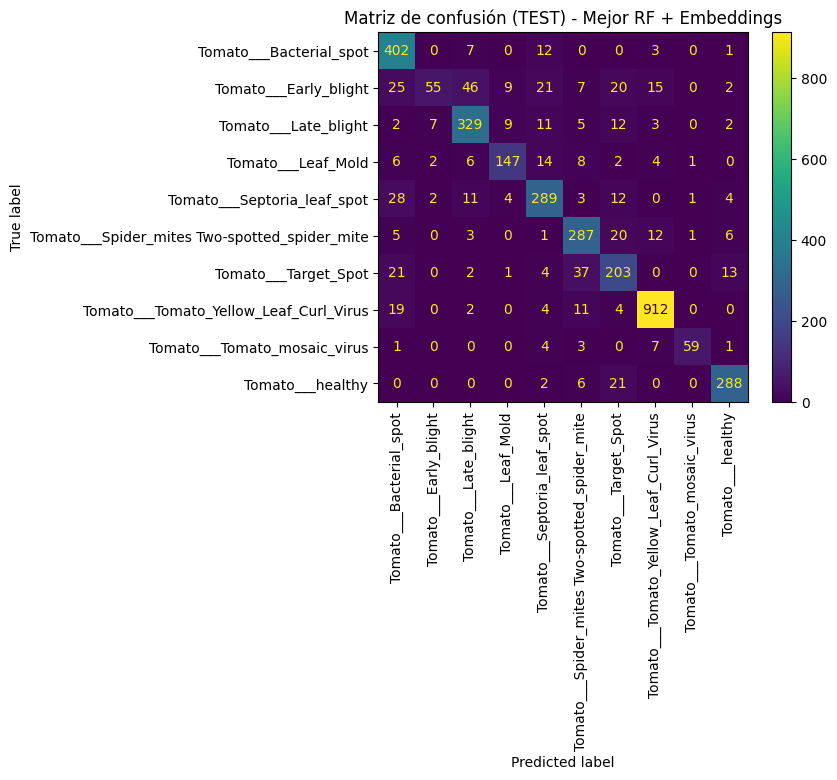

In [ ]:
# =========================
# BLOQUE 11: Evaluación final en TEST
# =========================
test_pred = best_rf.predict(X_test_deep)

print("Accuracy (test):", accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))

ConfusionMatrixDisplay.from_predictions(y_test, test_pred, xticks_rotation=90)
plt.title("Matriz de confusión (TEST) - Mejor RF + Embeddings")
plt.show()


# PARTE D — Despliegue simple: “subir imagen y predecir” (Colab)

# BLOQUE 12 — Subir una imagen y realizar una predicción (flujo de inferencia)



### Objetivo general
Este bloque implementa una **prueba de inferencia** (uso del modelo ya entrenado) sobre **una imagen nueva subida manualmente** al entorno de Google Colab.  
Su propósito es demostrar el flujo completo de despliegue a pequeña escala:

**entrada (imagen) → preprocesamiento → extracción de características profundas (embedding) → clasificación (Random Forest) → salida (etiqueta predicha).**

Este tipo de bloque es útil para:
- validar que el pipeline funciona “de extremo a extremo”,
- simular un escenario real de uso (usuario entrega una imagen),
- y preparar el terreno para un despliegue formal (API, app, etc.).

---

### Paso 1: Importación del módulo de carga de archivos de Colab
Se utiliza la herramienta nativa de Google Colab para permitir que el usuario seleccione y suba archivos desde su computador al notebook.

**Relevancia práctica:**
- Permite evaluar el modelo con imágenes externas al dataset.
- Facilita la demostración en una presentación (prueba en vivo o grabada).

---

### Paso 2: Carga de la imagen desde el computador al entorno Colab
Se ejecuta la acción de carga y se obtiene un diccionario donde las claves corresponden a los nombres de los archivos subidos.

Luego, se selecciona el **primer archivo** del conjunto subido.

**Interpretación:**
- Se asume que el usuario sube una sola imagen o que se desea procesar únicamente la primera.
- Se obtiene una ruta/nombre de archivo que será usado como entrada del pipeline.

---

### Paso 3: Confirmación del archivo cargado
Se imprime el nombre del archivo para verificar que la imagen fue cargada correctamente y para dejar trazabilidad en la ejecución.

**Valor metodológico:**
- Facilita depuración si se sube un archivo incorrecto.
- Permite documentar en el notebook qué imagen se utilizó en la prueba.

---

### Paso 4: Extracción del embedding (Deep Features) para la imagen subida
La imagen cargada se procesa con la misma función de extracción de características usada en entrenamiento:

1. Se aplica el preprocesamiento esperado por el extractor (redimensionamiento, normalización).
2. La CNN preentrenada transforma la imagen en un **vector numérico** (embedding).
3. Se fuerza `batch_size=1` porque se procesa una única imagen.

**Justificación técnica:**
- El clasificador final (Random Forest) no opera sobre píxeles directamente.
- Por consistencia, la imagen nueva debe pasar por **exactamente el mismo tipo de representación** que el modelo vio durante entrenamiento (misma CNN y mismo preprocesamiento).
- Esto evita un error metodológico común: evaluar el modelo con entradas en un formato distinto al entrenamiento.

---

### Paso 5: Predicción con el mejor modelo entrenado (Random Forest optimizado)
Se utiliza el modelo final seleccionado (tras Grid Search) para predecir la clase a partir del embedding.

**Interpretación conceptual:**
- El Random Forest recibe un vector que resume patrones visuales relevantes.
- El modelo retorna una etiqueta de clase (enfermedad o “healthy”).
- Se toma el primer resultado porque solo hay una muestra.

---

### Paso 6: Presentación del resultado al usuario
Se imprime la **etiqueta predicha**, que corresponde a la clase asignada por el sistema para la imagen subida.

**Valor de esta salida:**
- Demuestra el funcionamiento práctico del sistema.
- Permite verificar plausibilidad cualitativa del modelo (si la predicción tiene sentido).
- Sirve como ejemplo del “output” que se entregaría a un tomador de decisión en un escenario real.

---

## Resultado final del bloque
Al finalizar, se obtiene una predicción completa para una imagen externa, validando el pipeline de inferencia:

1. El usuario sube una imagen.
2. La imagen se transforma en un embedding usando el extractor CNN preentrenado.
3. El Random Forest optimizado clasifica la imagen.
4. Se entrega la clase predicha como salida.

Este bloque es una versión simple y demostrativa del **despliegue conceptual** exigido en proyectos académicos: muestra claramente el flujo entrada–predicción–salida, y puede extenderse luego a una API o aplicación.


In [ ]:
# =========================
# BLOQUE 12: Subir imagen y predecir (1 imagen)
# =========================
from google.colab import files

uploaded = files.upload()
uploaded_path = next(iter(uploaded.keys()))
print("Imagen subida:", uploaded_path)

# Extraer embedding de la imagen
feat = extract_deep_features([uploaded_path], batch_size=1)
pred_label = best_rf.predict(feat)[0]

print("Predicción:", pred_label)


Saving 0012b9d2-2130-4a06-a834-b1f3af34f57e___RS_Erly.B 8389.JPG to 0012b9d2-2130-4a06-a834-b1f3af34f57e___RS_Erly.B 8389.JPG
Imagen subida: 0012b9d2-2130-4a06-a834-b1f3af34f57e___RS_Erly.B 8389.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Predicción: Tomato___Septoria_leaf_spot
